In [6]:
import numpy as np
import PQAnalysis.io as pq_io
import PQAnalysis.traj as pq_tr
import PQAnalysis.atomic_system as pq_as


In [16]:
test_traj = pq_io.TrajectoryReader("mof5-md-07_sampling.xyz").read()



  0%|          | 0/2500 [00:00<?, ?it/s]

In [4]:
test_frame = test_traj.topology
test_as = test_traj[0]
len(test_traj)

12004

In [5]:
np.zeros((2, 3), dtype=float)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [6]:
def calculate_dist_matrix ():
    dist_matrix = np.zeros((len(test_traj), len(test_as.pos)))
    
    return dist_matrix


In [7]:
tester = calculate_dist_matrix()
tester.shape

(12004, 106)

In [8]:
frame_pos = test_as.pos
print(frame_pos)

[[ -9.1318      -5.326655    -1.7420261 ]
 [-10.810919    -6.1585484   -4.523131  ]
 [ -7.598489    -6.273227    -4.472847  ]
 [ -9.202004    -3.3491366   -4.478193  ]
 [ 10.714323     6.3907533    4.2827153 ]
 [  9.254918     5.2314363    1.6514648 ]
 [  7.5099306    6.22697      4.4724183 ]
 [  9.317657     3.4079006    4.439893  ]
 [  9.195266     5.370999     3.702822  ]
 [ -9.199797    -5.2726      -3.7364888 ]
 [-12.846951    -7.5903516   -0.8718327 ]
 [-11.761589    -7.437722     0.98209566]
 [ -4.6343684   -4.0300913   -7.065119  ]
 [-13.945097    -8.166067    -2.6896422 ]
 [-12.70175     -7.717244     0.53676254]
 [ -6.5950165   -3.5968554   -5.576123  ]
 [-11.815891    -6.844366    -1.6892087 ]
 [-13.919464    -8.199965    -1.5391428 ]
 [ -6.6252313   -4.90205     -5.4679193 ]
 [ -5.456054    -3.0861385   -6.4070945 ]
 [ -5.9019513   -0.9334577   -6.14469   ]
 [-10.782462    -6.414177    -1.0467954 ]
 [ -7.3913755   -2.8035383   -4.936785  ]
 [-12.008165    -6.597418    -2.90

In [9]:
# Mesh the array
m,n = np.meshgrid(frame_pos, frame_pos)

# Getting distance
res = abs(m-n)

# Display result
print("Result:\n",res,"\n")

Result:
 [[ 0.         3.8051448  7.3897734 ... 17.08681   19.074278  16.471298 ]
 [ 3.8051448  0.         3.5846288 ... 13.281665  15.269133  12.666153 ]
 [ 7.3897734  3.5846288  0.        ...  9.697036  11.6845045  9.081525 ]
 ...
 [17.08681   13.281665   9.697036  ...  0.         1.9874682  0.6155114]
 [19.074278  15.269133  11.6845045 ...  1.9874682  0.         2.6029797]
 [16.471298  12.666153   9.081525  ...  0.6155114  2.6029797  0.       ]] 



In [14]:
array = []

for i in range(0,len(test_traj)):
    m,n = np.meshgrid(test_traj[i].pos, test_traj[i].pos)
    res = abs(m-n)
    array.append(res)

print(array[5])

[[ 0.         3.983551   7.574264  ... 17.291142  19.339382  16.550385 ]
 [ 3.983551   0.         3.590713  ... 13.307591  15.355832  12.566833 ]
 [ 7.574264   3.590713   0.        ...  9.716878  11.765119   8.976119 ]
 ...
 [17.291142  13.307591   9.716878  ...  0.         2.0482407  0.7407589]
 [19.339382  15.355832  11.765119  ...  2.0482407  0.         2.7889996]
 [16.550385  12.566833   8.976119  ...  0.7407589  2.7889996  0.       ]]


In [30]:
test_frame = test_traj[0]





ERROR:    PQAnalysis.TypeChecking - PQTypeError

          Argument 'cells' with value=AtomicSystem(topology=(Topology with
          106 atoms and 0 residues and 0 unique residues.),
          cell=(Cell(x=18.5193, y=18.5193, z=18.5193, alpha=60.0,
          beta=60.0, gamma=60.0))) should be of type
          PQAnalysis.core.cell.cell.Cells, but got <class
          'PQAnalysis.atomic_system.atomic_system.AtomicSystem'>.


PQTypeError: Argument 'cells' with value=AtomicSystem(topology=(Topology with 106 atoms and 0 residues and 0 unique residues.), cell=(Cell(x=18.5193, y=18.5193, z=18.5193, alpha=60.0, beta=60.0, gamma=60.0))) should be of type PQAnalysis.core.cell.cell.Cells, but got <class 'PQAnalysis.atomic_system.atomic_system.AtomicSystem'>.

In [32]:
fram_test = test_traj[0:500]

traj_test = np.array([frame.pos for frame in fram_test])
# print(traj_test)

box_test = np.array([frame.cell for frame in fram_test])
# print(box_test)
type(box_test[0])



PQAnalysis.core.cell.cell.Cell

In [5]:
analysed_frames = test_traj[0:2000]


n = len(analysed_frames)
rmsd_matrix = np.zeros((n, n))

# Convert trajectories to a 3D numpy array
traj_array = np.array([t.pos for t in analysed_frames])



# Adjust differences for periodic boundary conditions
adjusted_diffs = np.minimum(np.abs(traj_array[:, np.newaxis] - traj_array), box_size - np.abs(traj_array[:, np.newaxis] - traj_array))


# Calculate the squared differences
squared_diffs = (traj_array[:, np.newaxis] - traj_array)**2

# Calculate the mean squared differences along the last axis
mean_squared_diffs = np.mean(squared_diffs, axis=-1)

# Take the square root to get the RMSD
rmsd_matrix = np.sqrt(mean_squared_diffs,)


# Take the square root to get the RMSD
rmsd_matrix_sum = np.sum(rmsd_matrix, axis=-1)



In [31]:
import numpy as np

# Assuming test_traj is a list of trajectories
analysed_frames = test_traj[0:2000]

n = len(analysed_frames)
rmsd_matrix = np.zeros((n, n))

# Convert trajectories to a 3D numpy array
traj_array = np.array([t.pos for t in analysed_frames])

# Only calculate the upper triangular matrix
for i in range(n):
    for j in range(i+1, n):  # Start from i+1 to avoid calculating the diagonal and duplicate entries
        # squared_diffs = np.sum((traj_array[i] - traj_array[j])**2)
        rmsd_matrix[i, j] = np.sum(np.sqrt((traj_array[i] - traj_array[j])**2))
        # rmsd_matrix[i, j] = np.sqrt(squared_diffs)



400.87814

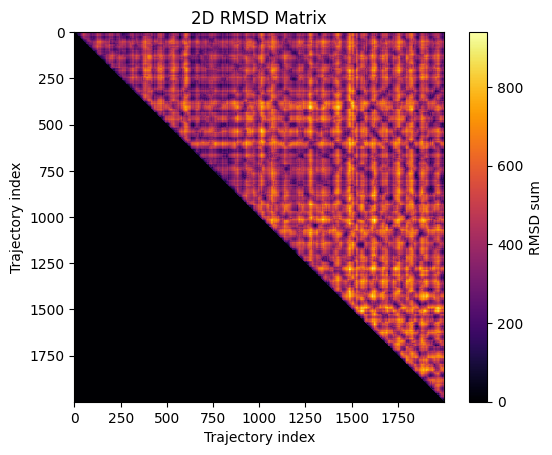

In [35]:
import matplotlib.pyplot as plt

# Assuming rmsd_matrix is your 2D RMSD matrix
plt.imshow(rmsd_matrix, cmap='inferno', interpolation='nearest')
plt.colorbar(label='RMSD sum')
plt.title('2D RMSD Matrix')
plt.xlabel('Trajectory index')
plt.ylabel('Trajectory index')
plt.show()


In [30]:
# Assuming rmsd_matrix is your 2D RMSD matrix
# Flatten the matrix and get the indices of the top 10 values

flat = rmsd_matrix.flatten()

top_10_indices_flat = np.argpartition(flat, -50)[-50:]

# Convert these indices to 2D
top_10_indices = np.unravel_index(top_10_indices_flat, rmsd_matrix_sum.shape)

print(top_10_indices)

print(flat[top_10_indices_flat])

(array([1279, 1281, 1280, 1278, 1276, 1011, 1012, 1277, 1021, 1021, 1016,
       1013, 1020, 1015, 1020, 1022, 1275, 1017, 1016,  405, 1017, 1015,
        405, 1022, 1019, 1020, 1019, 1022, 1022, 1018, 1280, 1015, 1015,
       1022, 1015, 1020, 1018, 1017, 1017, 1020, 1021, 1021, 1019, 1021,
       1018, 1016, 1016, 1281, 1016, 1017]), array([1620, 1616, 1616, 1620, 1620, 1620, 1620, 1620, 1625, 1620, 1625,
       1620, 1625, 1620, 1620, 1620, 1620, 1620, 1620, 1280, 1625, 1625,
       1281, 1625, 1624, 1622, 1623, 1624, 1623, 1623, 1620, 1624, 1623,
       1622, 1622, 1623, 1624, 1622, 1623, 1624, 1624, 1623, 1622, 1622,
       1622, 1624, 1623, 1620, 1622, 1624]))
[11143.91601562 11181.84765625 11182.78710938 11176.03320312
 11196.640625   11280.81640625 11322.66699219 11199.12207031
 11347.3125     11343.375      11332.60449219 11271.21777344
 11353.67089844 11318.5859375  11341.75       11354.5859375
 11203.38964844 11324.20214844 11325.125      11305.23242188
 11333.12890625 11329